# Decision Tree Classifier for Iris Dataset 

## Decision Tree :
Decision Tree: A Decision Tree is a supervised learning algorithm. It is a graphical representation of all the possible solutions. All the decisions were made based on some conditions.

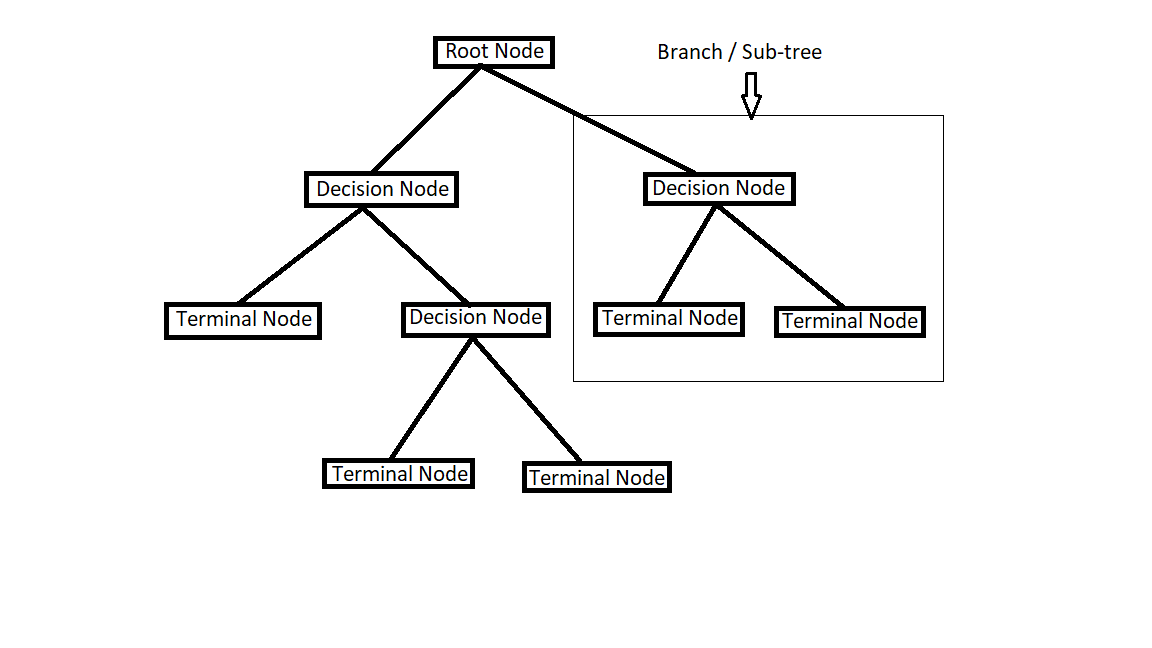

### Terminologies :
**Root node:** The root node is the base node of the tree where the entire tree starts from it.

**Terminal Node/Leaf Node:** This is the final node where no further segregation is possible.

**Branch/Sub-tree:** A branch is formed by splitting a node.

**Pruning:** Pruning is the opposite of splitting. Pruning is the process of removing nodes to decrease the size of the decision tree.

**Parent Node/Child Node:** Always root node is the parent node and all the other nodes which are derived from the parent node are known as child nodes.

To understand more, Take this example which is represented in a tree model below.

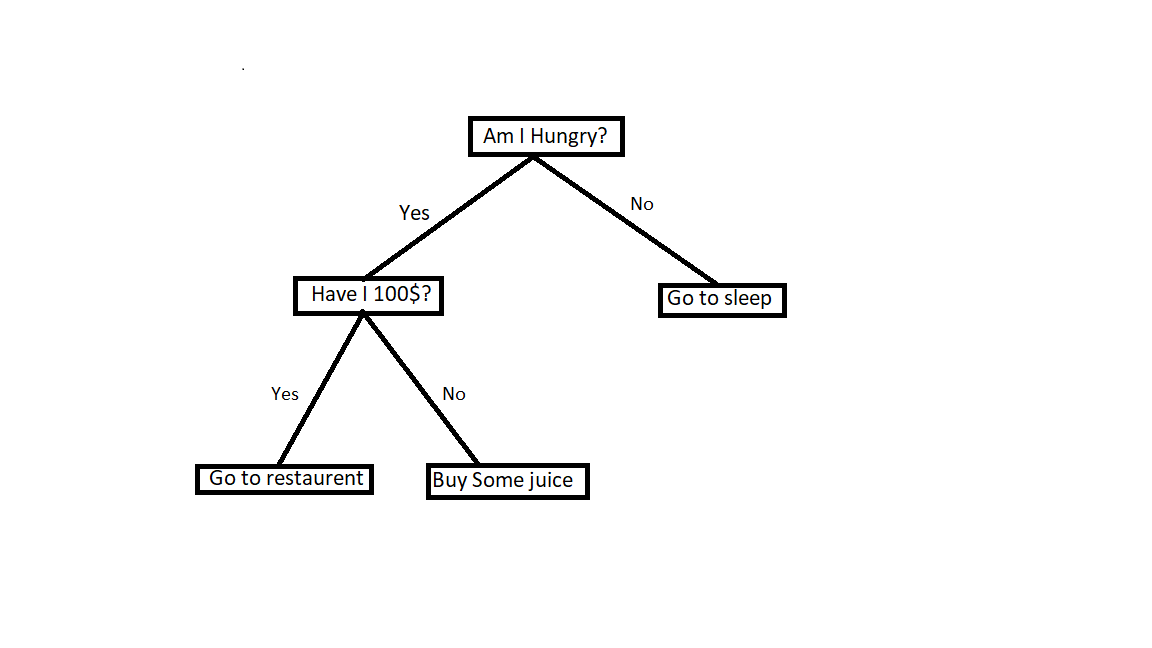

Here the root node is a question asking whether you are hungry or not. If you are not hungry then go back to sleep. If you are hungry then check whether you have 100 dollars or not. If you have sufficient money then go to the restaurant. If you don’t have enough money then go and just buy some juice.

In this way, the Decision Tree divides into different groups based on some conditions.

### Dataset
http://archive.ics.uci.edu/ml/datasets/Iris
### Import the required libraries

In [1]:
# import required libraries
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step-1 Load Iris dataset:

In [2]:
 columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
iris_df = pd.read_csv('iris.data', names=columns)
iris_df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2 – Analyze and visualize the dataset:

In [3]:
iris_df.isnull().any()

Sepal length    False
Sepal width     False
Petal length    False
Petal width     False
Class_labels    False
dtype: bool

In [4]:
iris_df.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class_labels     object
dtype: object

In [5]:
iris_df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Perform pair plotting to view relationship between the features present in the data

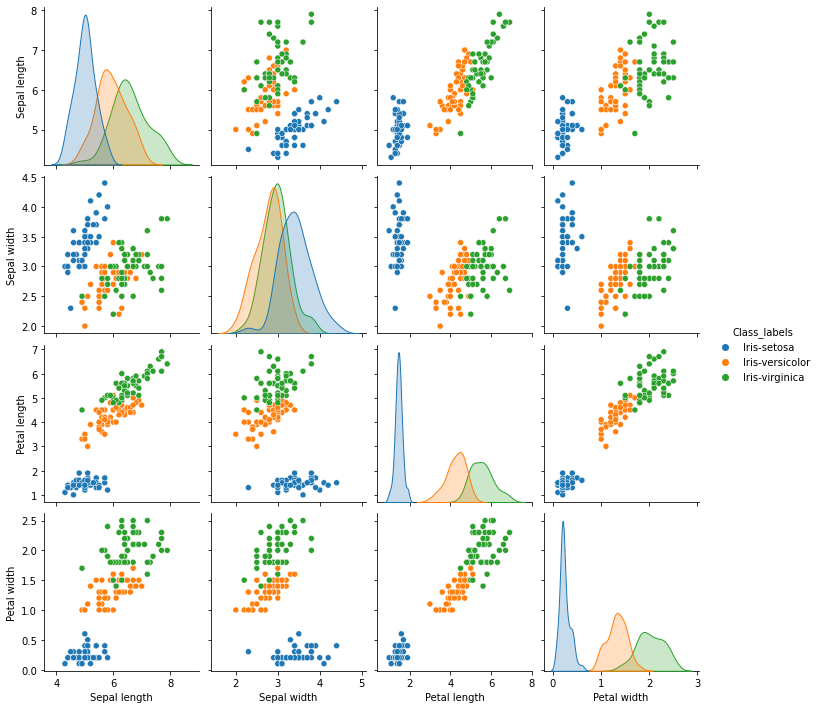

In [6]:
sns.pairplot(iris_df, hue='Class_labels')

### Step-3 Split data into train and test set:

In [7]:
X = iris_df[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']].values
y = iris_df['Class_labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

### Step-4 Train the decision tree classifier:

In [8]:
#scikit learn decision tree model training 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  

### Step-5 Test the trained model:

In [9]:
prediction = clf.predict(X_test)
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

Perform Model Evaluation on Test set

In [10]:
# evaluation for multi class classification
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



Plot Confusion Matrix

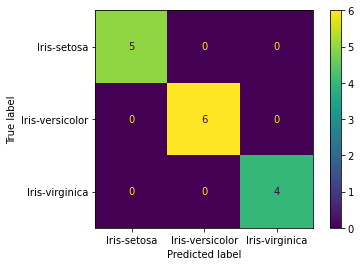

In [11]:
plot_confusion_matrix(clf, X_test, y_test)

### Step-6 Visualize the Decision Tree:

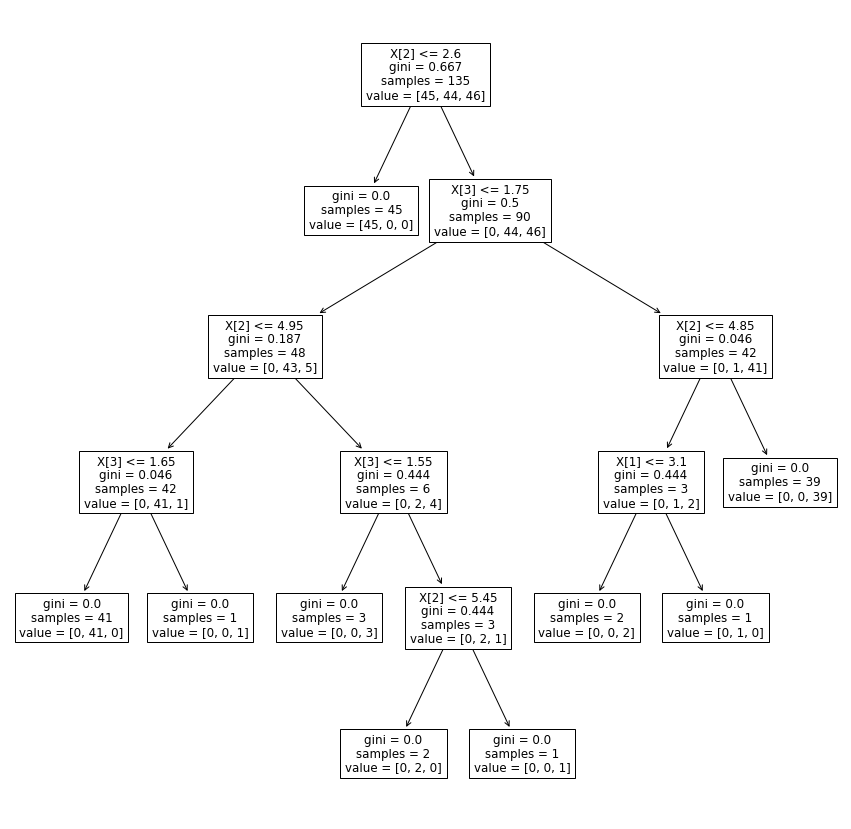

In [18]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf)
plt.show()

### Feeding new data to the classifier to predict the right class

In [15]:
SepalLengthCm = 4.8
SepalWidthCm = 2.9
PetalLengthCm = 1.3
PetalWidthCm = 0.2

In [19]:
x = [[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]]

res = clf.predict(x)
res

array(['Iris-setosa'], dtype=object)